<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
    2.1 [**Project Details**](#Section21)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
    3.1 [**Installing Libraries**](#Section31)<br>
    3.2 [**Upgrading Libraries**](#Section32)<br>
    3.3 [**Importing Libraries**](#Section33)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
    4.1 [**Data Description**](#Section41)<br>
    4.2 [**Data Information**](#Section42)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
    8.1 [**Which Region has more HNI's??**](#Section81)<br>
    8.2 [**What Age group has more HNI's?**](#Section82)<br>
    8.3 [**How is Occupation related to net worth?**](#Section83)<br>
    8.4 [**How is Insurance related to net worth?**](#Section84)<br>
    8.3 [**What are the Portfolio balances of HNI's?**](#Section83)<br>
9. [**Summarization**](#Section9)<br>
    9.1 [**Conclusion**](#Section91)<br>
    9.2 [**Limitations**](#Section92)<br>
    9.3 [**Actionable Insights**](#Section93)<br>
    9.4 [**Recommendations for further analysis**](#Section94)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

**Company Introduction - AE Corp**

Our client for this project is a retail banking institution.

- They are going to float a stock trading facility for their existing customers.
- The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
- They will have to incentivize their customers to adopt their offerings.
- One way to incentivize could be to offer discounts on the commission for trading transactions.

**Current Scenario**

The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

---
<a name = Section2></a>
# **2. Problem Statement**
---

The current process suffers from the following problems:

- Only about 10% of the customers do enough trades for earnings after discounts to be profitable.
- The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

<a name = Section21></a>
### **2.1 Project Details**

- Co-ordinating with - The marketing department to supplement their campaigns with a more proactive approach.

- Our Role - To build a classification model using the datasets.

- Project Deliverables - Predict whether a customer belongs to a high net worth or low net worth group.

- Machine Learning Task: Classification

- Target Variable: Status (high net worth (1) / low net worth (2))

- Win Condition - No machine learning model in the company for this currently, therefore no quantifiable win condition. We just need to build the best possible model.

- Evaluation Metric - The model evaluation will be based on the F1 Score score.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**

<a name = Section31></a>
### **3.1 Installing Libraries**

In [35]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q matplotlib seaborn bokeh plotly

<a name = Section31></a>
### **3.2 Upgrading Libraries**

In [36]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn

In [37]:
# Runtime Restart Reminder

print('\n' + 'Libraries Upgraded please restart runtime')
print('\n' + '-'*45)


Libraries Upgraded please restart runtime

---------------------------------------------


<a name = Section31></a>
### **3.3 Importing Libraries**

In [38]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)          # To suppress scientific notation over exponential values 
#-------------------------------------------------------------------------------------------------------------------------------
from ydata_profiling import ProfileReport                           # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
np.set_printoptions(precision=2, suppress=True)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact                                     # Creates UI controls for exploring code and data
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.

---

Train Set: The train set contains 8124 rows and 32 columns.The last column Revenue_Grid is the target variable.

Test Set: The test set contains 2031 rows and 31 columns.The test set doesn’t contain the Revenue_Grid column which need to be predicted

The Dataset contains the following columns:


|Id|Feature|Description|
|:--|:--|:--|
|01|REF_NO| Reference Number of the customer.|
|02|children|Number of children each customer has.|
|03|Age_band|Age Group to which the customer belongs.|
|04|status|Marital Status of the customer.|
|05|occupation|Job or profession of the customer.|
|06|occupation_partner|Job or profession of the customer's partner.|
|07|home_status|Home Status of the customers.|
|08|family_income|Income Range of the customer's family.|
|09|self_employed|Whether self-employed or not.|
|10|self_employed_partner|Whether the partner self-employed or not.|
|11|year_last_moved|Moving Year from the last location of the customer.|
|12|TVarea|Television Region of the customer.|
|13|post_code|Postal Code of the customer.|
|14|post_area|Postal Area of the customer.|
|15|Average_Credit_Card_Transaction|Average Credit Card Transaction per year by the customer.|
|16|Balance_Transfer|Transfer of the Balance in an account to another account by the customer.|
|17|Term_Deposit|Cash Investment Help at Financial Institute provided to the customer.|
|18|Life_Insurance|Basic Life Insurance Coverage of the customer.|
|19|Medical_Insurance|Medical Insurance Coverage of the customer.|
|20|Average_A/C_Balance|Average Balance in the account of the customer.|
|21|Personal_Loan|Amount of Personal Loan taken by the customer.|
|22|Investment_in_Mutual_Fund|Amount Invested in Mutual Funds by the customer.|
|23|Investment_Tax_Saving_Bond|Amount Invested in Tax Saving Bond by the customer.|
|24|Home_Loan|Amount of Home Loan taken by the customer.|
|25|Online_Purchase_Amount|Amount spent by the customer on online purchases.|
|26|gender|Gender of the customer.|
|27|region|Religion of the customer.|
|28|Investment_in_Commudity|Amount Invested in Commodity by the customer.|
|29|Investment_in_Equity|Amount Invested in Equity by the customer.|
|30|Investment_in_Derivative|Amount Invested in Derivatives by the customer.|
|31|Portfolio_Balance|Balanced Investment Strategy of the customer.|
|32|Revenue_Grid|Grid report of the customers.|

In [39]:
# Acquiring Data from "https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/AE%20Corp"

print('\n' + '-'*25 + '\n')
print('Acquiring Data' + '\n' + 'Loaded Dataset: df_train & df_test')
print('\n' + '-'*25 + '\n')

df_train = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/AE%20Corp/existing_base_train.csv')
df_test = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/Mihir-Ai-lab/Insaid/main/ML%20Projects/AE%20Corp/existing_base_test.csv')

# Checking Shape & Head

print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)


-------------------------

Acquiring Data
Loaded Dataset: df_train & df_test

-------------------------

Training Data Shape: (8124, 32)
Test Data Shape: (2031, 31)

-------------------------

Training Data Head

----------



,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2
5,3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,1984,Ulster,BT17 9NA,BT17,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,Female,Northern Ireland,13.18,4.83,14.23,33.62,2
6,6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,1986,Central,B62 8TF,B62,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,Female,West Midlands,2.00,23.48,21.90,13.12,2
7,10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1998,Granada,PR8 2TY,PR8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,Male,North West,0.00,4.99,4.99,15.74,2
8,2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,1980,Unknown,CF15 9TH,CF15,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,Female,Unknown,27.18,4.83,13.66,36.05,2
9,9356,3,36-40,Partner,Professional,Housewife,Own Home,"<27,500, >=25,000",Yes,No,1997,Meridian,M13 9BG,M13,0.00,0.00,0.00,0.00,0.00,0.00,15.99,0.00,24.47,0.00,0.00,Male,North West,0.00,6.74,6.74,8.60,2


<a name = Section42></a>
### **4.2 Data Description**

In [40]:
df_train.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00
mean,5797.34,1967.88,23.25,46.08,27.28,65.32,18.83,31.84,25.42,41.72,6.06,4.42,19.20,36.15,21.44,31.53,89.35,1.89
std,3322.50,182.56,51.15,79.08,54.13,95.76,32.02,45.25,85.13,64.42,12.67,9.95,92.34,42.47,32.26,39.48,108.30,0.31
min,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-78.43,1.00
25%,2924.75,1978.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.28,4.66,8.74,26.28,2.00
50%,5811.50,1988.00,0.00,17.48,0.00,31.48,0.01,14.98,0.00,23.48,0.00,0.00,0.00,23.59,12.82,21.14,65.56,2.00
75%,8681.50,1994.00,23.48,64.99,34.49,92.89,26.97,45.92,20.83,59.44,5.49,4.49,7.48,49.80,27.97,42.39,123.97,2.00
max,11518.00,1999.00,662.26,2951.76,784.82,2930.41,591.04,626.24,4905.93,2561.27,156.87,162.35,4306.42,1231.09,1279.10,1771.16,4283.56,2.00


<a name = Section43></a>
### **4.3 Data Information**

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

---
<a name = Section5></a>
# **5. Data Pre-Profiling**

In [42]:
# Detailed Profile Report of training Data for univariate analysis

profile = ProfileReport(df=df_train) 

print('\n' + '-'*40 + '\n')
print('AE Corp Pre-profile Report Generated')
print('\n' + '-'*40 + '\n')


----------------------------------------

AE Corp Pre-profile Report Generated

----------------------------------------



In [43]:
#Loading profile report to file for record keeping

profile.to_file("AEcorp_preprofile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section6></a>
# **6. Data Pre-Processing**

In [44]:
# Making a copy of the Dataset incase it needs to be reffered back to
df_train_og = df_train.copy(deep=True)
df_test_og = df_train.copy(deep=True)

In [45]:
# Define a dictionary to map the old column names to new standardized column names

column_names = {
    'REF_NO': 'ref_no',
    'children': 'num_children',
    'Age_band': 'age_group',
    'status': 'marital_status',
    'TVarea': 'tv_region',
    'post_code': 'postcode',
    'Average_Credit_Card_Transaction': 'avg_credit_card_txn',
    'Balance_Transfer': 'balance_transfer',
    'Term_Deposit': 'term_deposit',
    'Life_Insurance': 'life_insurance',
    'Medical_Insurance': 'medical_insurance',
    'Average_A/C_Balance': 'avg_account_balance',
    'Personal_Loan': 'personal_loan',
    'Investment_in_Mutual_Fund': 'mutual_fund_investment',
    'Investment_Tax_Saving_Bond': 'tax_saving_bond_investment',
    'Home_Loan': 'home_loan',
    'Online_Purchase_Amount': 'online_purchase_amount',
    'Investment_in_Commudity': 'commodity_investment',
    'Investment_in_Equity': 'equity_investment',
    'Investment_in_Derivative': 'derivative_investment',
    'Portfolio_Balance': 'portfolio_balance',
    'Revenue_Grid': 'net_worth'
}

# Rename the columns of the train and test datasets
df_train = df_train.rename(columns=column_names)
df_test = df_test.rename(columns=column_names)

In [46]:
# Extracting Categorical & Numerical columns to perform further analysis & cleaning

categorical_cols = df_train.select_dtypes('object').columns
numerical_cols = df_train.select_dtypes(['int', 'float']).columns

# Checking Unique Values in Dataset by taking a sample of and displaying few unique values from it.
# Frequent re-runs can help finding some datapoints of relevance to research.

print('\n' + 'Having a look at unique Values in each Column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)
        
    print("Column Name: {}\n".format(col))
    if col in categorical_cols:
        print("Data Type: Categorical | Unique Values: {}\n".format(num_unique))
        print(unique_vals[:])
    else:
        print("Data Type: Numerical | Unique Values: {}\n".format(num_unique))
        print(df_train[col].sample(500).unique()[:50])
        
    print('\n' + '-'*70 + '\n')


Having a look at unique Values in each Column

--------------------------------------------------

Column Name: ref_no

Data Type: Numerical | Unique Values: 8124

[ 7284 10537  8640  7850  8966  5521  1284 11452  8863  8382  8868  7921
  3498  2626  4444 11373  4490  8155  5295  2070 10613  6092  6459  5476
 10414  4589  3605  4143   975  5842  6176  2555  3023  3134 10793  1009
  8490   266  7462  3384  6777  7806  7875 11381  2253  2853  3688  9311
  4924  7066]

----------------------------------------------------------------------

Column Name: num_children

Data Type: Categorical | Unique Values: 5

['2' 'Zero' '1' '3' '4+']

----------------------------------------------------------------------

Column Name: age_band

Data Type: Categorical | Unique Values: 13

['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' 'Unknown' '18-21']

----------------------------------------------------------------------

Column Name: marital_status

Data Type: 

In [47]:
# Removing ref_no column as it is just an identifier
df_train = df_train.drop(columns=['ref_no'])

# Replace 1 with HNI and 2 with Non HNI in net_worth column
df_train['net_worth'] = df_train['net_worth'].replace({1: 'HNI', 2: 'Non HNI'})

# Replace zero with 0 and 4+ with 4 in num_children column
df_train['num_children'] = df_train['num_children'].replace({'zero': 0, 'Zero': 0, '4+': 4}).astype(int)

In [48]:
# Resetting Numerical and Categorical columns after making changes

categorical_cols = df_train.select_dtypes('object').columns
numerical_cols = df_train.select_dtypes(['int', 'float']).columns

In [49]:
# Function to replace Unknown, Unclassified & 0's with NaNs
def replace_unknown_with_nan(df, columns):
    for col in columns:
        df[col] = df[col].replace({'Unknown','Unclassified', 0 }, np.nan)
    return df

# Replacing Unknown & Unclassified with NaNs in categorical columns
df_train = replace_unknown_with_nan(df_train, categorical_cols)
# Replacing Unknown & Unclassified with NaNs in numerical columns
df_train = replace_unknown_with_nan(df_train, numerical_cols)

In [50]:
print(df_train.isnull().sum())

num_children                  4991
age_band                        44
marital_status                  40
occupation                     449
occupation_partner            1942
home_status                     44
family_income                  108
self_employed                    0
self_employed_partner            0
year_last_moved                 69
tv_region                      154
postcode                         0
post_area                        0
avg_credit_card_txn           4989
balance_transfer              3524
term_deposit                  4587
life_insurance                2454
medical_insurance             4046
avg_account_balance           2806
personal_loan                 5134
mutual_fund_investment        2602
tax_saving_bond_investment    5133
home_loan                     5609
online_purchase_amount        5700
gender                          31
region                         866
commodity_investment           825
equity_investment              915
derivative_investmen

### Observations

- num_children has 4991 nans so we will replace with 0
- age_band has 44 nans, we will see thier 'occupation' to figure out how to impute missing values.
- marital_status has 40 nans, we will replace them with mode
- occupation has 449 nans, we will use 'age_band' & 'self_emplyed' column to impute.
- occupation_partner has 1942 nans. we treat it like occupation since we have 'self_employed_partner' column too with no nans
- home_status has 44 nans. We impute with mode
- family_income has 108 nans, we can check 'occupation', 'occupation_partner', 'self_employed' & 'self_employed_partner' columns to figure out how to impute.
- 'self_employed' & 'self_employed_partner' columns have 0 nans
- year_last_moved has 69 nans. we can cross verify agains 'home_loan'
- tv_region has 154 nans but we might drop this since we already have 'region'
- postcode has 0 nans but high cardinality so we will drop this column
- post_area has 0 nans, we will use this column to impute missing values in region and then drop the column.
- avg_credit_card_txn has 4989 nans, we will replace them by 0
- balance_transfer has 3524 nans, we will replace them by 0
- term_deposit has 4587 nans, we will replace them by 0
- 'life_insurance' has 2454 nans & 'medical_insurance' has 4046 nans. we will see impact of these variables on 'net_worth' column and then if necessary we will merge them into a single column 'insurance' and replace the nans with 0
- avg_account_balance has 2806 nans, we will turn them to 0
- personal_loan has 5134 nans. this can probably be combined with 'home_loan' after checkng thier impact individually on 'net_worth'
- 'mutual_fund_investment' with 2602 nans & 'tax_saving_bond_investment' with 5133 nas can be combined into 1 columns 'sip_investments"
- home_loan has 5609 nans
- online_purchase_amount has 5700. this column should be related to 'avg_credit_card_txn'
- gender has 31 nans. we might change it to 'Unknown' category.
- region has 866 nans. we will be using 'post_area' to impute the values.
- 'commodity_investment' with 825 nans & 'equity_investment' with 915 nans & 'derivative_investment' with 445 nans can be combined into 'lumpsum_investments' and nans can be filled with 0's
- portfolio_balance has 0 nans
- net_worth our y variable has 0 nans

In [51]:
# Replacing null values back to 0 in Number of children
df_train['num_children'] = df_train['num_children'].fillna(0)

In [52]:
filtered_rows = df_train['age_band'].isnull()
selected_columns = ['occupation', 'marital_status', 'family_income', 'net_worth']
result = df_train.loc[filtered_rows, selected_columns]
print(result)

             occupation        marital_status      family_income net_worth
124                 NaN                   NaN                NaN   Non HNI
226                 NaN               Partner                NaN       HNI
266        Professional               Partner           >=35,000   Non HNI
773                 NaN                   NaN                NaN       HNI
1211                NaN                   NaN                NaN   Non HNI
1351                NaN                   NaN                NaN   Non HNI
1498                NaN                   NaN                NaN   Non HNI
1633                NaN                   NaN                NaN   Non HNI
1679       Professional               Partner           >=35,000   Non HNI
1901                NaN                   NaN                NaN   Non HNI
2014       Professional               Partner                NaN   Non HNI
2021                NaN                   NaN                NaN   Non HNI
2195                NaN  

In [53]:
# Find the mode of the age_band column

age_band_mode = df_train['age_band'].mode().iloc[0]

# Define a function to apply the imputation logic

def impute_age_band(row):
    age_band = row['age_band']
    occupation = row['occupation']
    
    if pd.isna(age_band):  # Check for NaN value
        if occupation == 'Retired':
            return '71+'
        else:
            return age_band_mode
    else:
        return age_band

# Apply the function to each row of the dataframe

df_train['age_band'] = df_train.apply(impute_age_band, axis=1)

In [54]:
df_train['marital_status'] = df_train['marital_status'].fillna(df_train['marital_status'].mode().iloc[0])

In [55]:
# Select rows with null values in either 'occupation' or 'occupation_partner'
filtered_rows = df_train['occupation'].isnull() | df_train['occupation_partner'].isnull()

# Select specific columns
selected_columns = ['age_band', 'self_employed', 'self_employed_partner', 'net_worth']

# Filter the DataFrame using the filtered_rows mask and select the specified columns
result = df_train.loc[filtered_rows, selected_columns]

# Print the result
print(result)

     age_band self_employed self_employed_partner net_worth
14      36-40            No                    No   Non HNI
15      51-55            No                    No   Non HNI
18      26-30            No                    No   Non HNI
19      55-60            No                   Yes   Non HNI
20      65-70            No                    No       HNI
22      22-25            No                    No   Non HNI
23        71+            No                    No   Non HNI
24      55-60            No                   Yes   Non HNI
35        71+            No                    No   Non HNI
37      22-25            No                   Yes   Non HNI
39      22-25            No                   Yes   Non HNI
42      65-70            No                    No   Non HNI
45      26-30            No                    No   Non HNI
48      51-55            No                    No   Non HNI
49      41-45            No                    No   Non HNI
50      61-65            No             

In [56]:
# Function to impute missing values in the 'occupation' and 'occupation_partner' columns
# based on the 'age_band', 'self_employed', and 'self_employed_partner' columns.
def impute_occupation(row):
    occupation = row['occupation']
    occupation_partner = row['occupation_partner']
    age_band = row['age_band']
    self_employed = row['self_employed']
    self_employed_partner = row['self_employed_partner']

    # Impute missing values for 'occupation'.
    if pd.isna(occupation):
        if age_band in ['65-70', '71+']:
            occupation = 'Retired'
        elif self_employed == 'Yes':
            occupation = 'Business Manager'
        else:
            occupation = 'Professional'

    # Impute missing values for 'occupation_partner'.
    if pd.isna(occupation_partner):
        if age_band in ['65-70', '71+']:
            occupation_partner = 'Retired'
        elif self_employed_partner == 'Yes':
            occupation_partner = 'Business Manager'
        else:
            occupation_partner = 'Professional'

    return occupation, occupation_partner


# Apply the impute_occupation function to each row in the dataframe,
# updating the 'occupation' and 'occupation_partner' columns accordingly.
df_train[['occupation', 'occupation_partner']] = df_train.apply(lambda row: impute_occupation(row), axis=1, result_type='expand')

In [58]:
df_train['home_status'] = df_train['home_status'].fillna(df_train['home_status'].mode().iloc[0])

In [59]:
filtered_rows = df_train['family_income'].isnull()
selected_columns = ['occupation', 'occupation_partner', 'self_employed', 'self_employed_partner']
result = df_train.loc[filtered_rows, selected_columns]
print(result)

             occupation occupation_partner self_employed self_employed_partner
49     Business Manager       Professional            No                    No
81    Secretarial/Admin      Manual Worker            No                    No
124        Professional       Professional            No                    No
125             Retired       Professional            No                    No
152   Secretarial/Admin   Business Manager            No                    No
153             Retired            Retired            No                    No
226        Professional       Professional            No                    No
230           Housewife       Professional            No                    No
240        Professional       Professional            No                    No
276        Professional          Housewife            No                    No
573           Housewife       Professional            No                    No
773        Professional       Professional          

In [ ]:
# Checking Unique Values in Dataset by taking a sample of and displaying few unique values from it.
# Frequent re-runs can help finding some datapoints of relevance to research.

print('\n' + 'Having a look at unique Values in each Column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)
        
    print("Column Name: {}\n".format(col))
    if col in categorical_cols:
        print("Data Type: Categorical | Unique Values: {}\n".format(num_unique))
        print(unique_vals[:])
    else:
        print("Data Type: Numerical | Unique Values: {}\n".format(num_unique))
        print(df_train[col].sample(500).unique()[:50])
        
    print('\n' + '-'*70 + '\n')


Having a look at unique Values in each Column

--------------------------------------------------

Column Name: num_children

Data Type: Numerical | Unique Values: 5

[0 1 2 3]

----------------------------------------------------------------------

Column Name: age_band

Data Type: Categorical | Unique Values: 13

['31-35' '45-50' '36-40' '55-60' '61-65' '65-70' '41-45' '51-55' '26-30'
 '22-25' '71+' nan '18-21']

----------------------------------------------------------------------

Column Name: marital_status

Data Type: Categorical | Unique Values: 5

['Partner' 'Divorced/Separated' 'Single/Never Married' 'Widowed' nan]

----------------------------------------------------------------------

Column Name: occupation

Data Type: Categorical | Unique Values: 9

['Professional' 'Secretarial/Admin' 'Manual Worker' 'Housewife' 'Retired'
 'Other' nan 'Business Manager' 'Student']

----------------------------------------------------------------------

Column Name: occupation_partner

Da


------------------------------------------------------------

Creating Box Plots to Identify Inconsistent Data and Outliers

------------------------------------------------------------



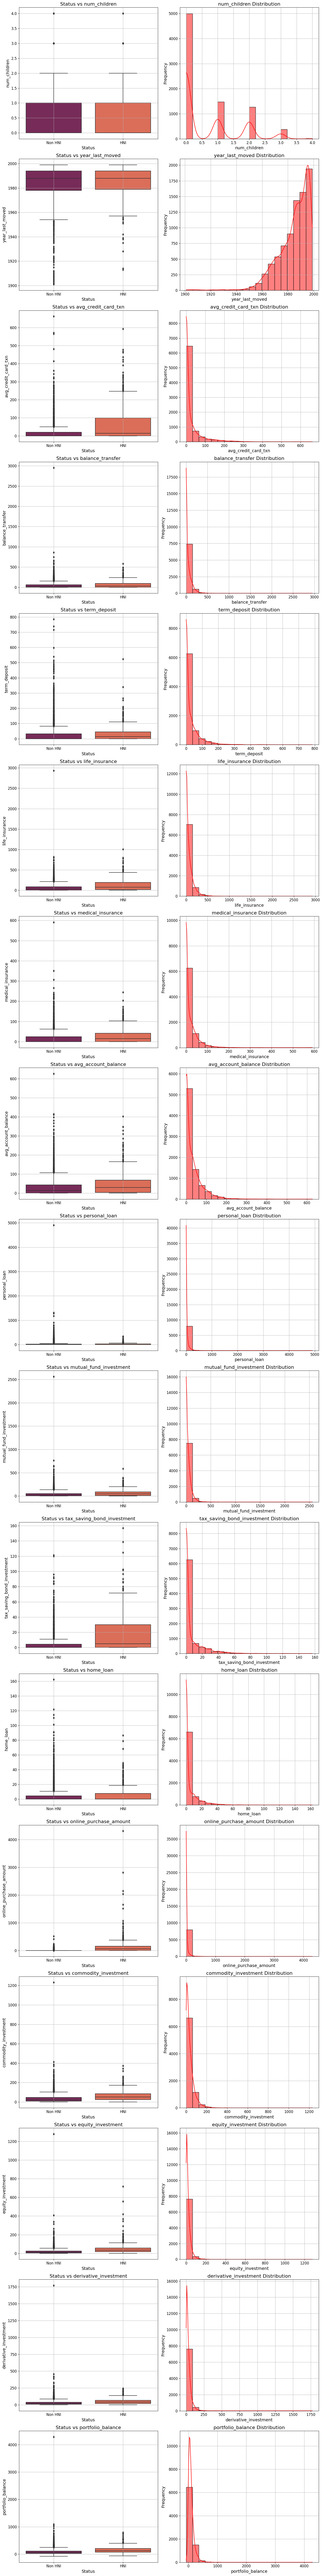

In [ ]:
print('\n' + '-'*60 + '\n')
print("Creating Box Plots to Identify Inconsistent Data and Outliers")
print('\n' + '-'*60 + '\n')

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, len(numerical_cols)*7))

# Loop through each numerical column and create a boxplot on the corresponding subplot
for i, col in enumerate(numerical_cols):
    row = i // 2
    col_num = i % 2
    sns.boxplot(x='Status', y=col, data=df_train, ax=axes[i, 0], palette='rocket')
    axes[i, 0].set_xlabel('Status', size=14)
    axes[i, 0].set_ylabel(col, size=14)
    axes[i, 0].tick_params(labelsize=12)
    axes[i, 0].set_title('Status vs ' + col, size=16)
    axes[i, 0].grid(b=True)

    sns.histplot(x=col, data=df_train, bins=20, ax=axes[i, 1], kde=True, color='red')
    axes[i, 1].set_xlabel(col, size=14)
    axes[i, 1].set_ylabel('Frequency', size=14)
    axes[i, 1].tick_params(labelsize=12)
    axes[i, 1].set_title(col + ' Distribution', size=16)
    axes[i, 1].grid(b=True)

plt.tight_layout()
plt.show()

In [ ]:

# Combine Life_insurance and Medical_insurance
df_copy['Insurance'] = df_copy['Life_Insurance'] + df_copy['Medical_Insurance']
df_copy = df_copy.drop(columns=['Life_Insurance', 'Medical_Insurance'])

# Combine Investment_in_Mutual_Fund and Investment_Tax_Saving_Bond
df_copy['Investment_sip'] = df_copy['Investment_in_Mutual_Fund'] + df_copy['Investment_Tax_Saving_Bond']
df_copy = df_copy.drop(columns=['Investment_in_Mutual_Fund', 'Investment_Tax_Saving_Bond'])

# Combine Investment_in_Commudity, Investment_in_Equity and Investment_in_Derivative
df_copy['Investment_lumpsum'] = df_copy['Investment_in_Commudity'] + df_copy['Investment_in_Equity'] + df_copy['Investment_in_Derivative']
df_copy = df_copy.drop(columns=['Investment_in_Commudity', 'Investment_in_Equity', 'Investment_in_Derivative'])

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- Getting a report about the data after the data manipulation.


In [ ]:
# Profile Report of Cleaned Dataset

profile = ProfileReport(df=df_clean) 
print('\n' + '-'*40 + '\n')
print('AE Corp Post-profile Report Generated')

In [ ]:
# Loading profile report to frame

profile.to_notebook_iframe()

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- So essentially to make the best wine (leaving alcohol content aside), Vintest needs to control the Density & pH of wines.
- They can do that with the help of Sulphates & Citric Acid respectively
- How much Sulphates or Citric Acid to add will depend upon the type of wine they are making
- However while adding sulphates they need to keep a check on the Total & Free SO2 levels in wine
- Similarly while adding citric acid, they need to keep a check on pH of wine.
- Small levels of Free SO2 are found in wines but as long as they do not go above the sensory threshold, its good.
- Chlorides and Volatile Acidity are surely bad for wines and the lower the content of these 2, the better the wine is.

<a name = Section92></a>
### **9.2 Limitations**

- We have Imbalanced Datasets currently
    - We have only 5 Excellent wines,809 Good wines & 2789 Average wines.
    - We have only 61 wines which do not have citric acid in them so our analysis might not be that accurate.
    - Most of the Wines under the study are Light body(3249) vs Medium BOdy (489) and Full BOdy (Only 9)

- Meat Pairing Labels - Not Available

- Climate conditions where the Wine is Consumed - Not Available

- Type of Wine Red/White - Not Available

- Where the Wine is made will also strongly affect the Chlorides. This information is also Not Available

<a name = Section93></a>
### **9.3 Actionable Insights**

- People in the U.S clearly Prefer Light to Medium Body Wines. To Enter the Market we would suggest to go ahead with either of them

- Starting with a Dry wine to enter the market is a great idea since there will be higher chances of it beiong liked more

- Volatile Acidity above 0.7 should straight away be discarded and deeper research needed to explore factors that affect the Volatile Acidity.

- Citric Acid is surely helping to gain better ratings for the wine

- Chlorides are pretty much like a poison to the Wines so maintaining lower levels would also be key

- Maintaining a Free SO2 level of 30 and Total SO2 level of around 120 by adding the necessary amounts of sulphates would also be a key to getting the wine rated higher in Quality

<a name = Section94></a>
### **9.4 Recommendations for further Analysis**

- Since Vintest is looking to Launch in India, Getting the quality rating by the Local people would be a better idea since Wine-making is actually the art of Striking the right Balance of Flavours that suit the LOcal Taste and the TIme and Weather in Which it is consumed.

- There is no 1 Great wine that will be liked by all and a deeper analysis with regular feedback system would be the best solution to Actually Develop the AI Solution that Vintest is looking for.

- One suggestion would be to reward the consumers for giving Feedback in some manner to encourage better Data Acquisition.